# Neural Networks

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **forward** and **backward** operations for different layers in neural networks, the layers including:
  - fully-connected layer
  - pooling layer
  - relu layer
  - convolution layer
- implement stochastic gradient descent with momentum for optimization
- implement neural networks for classification on the mnist digit classification dataset

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

This homework is modified from the assignment2 of [cs231n](http://cs231n.stanford.edu/) in stanford.

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from fc_net import *
from data_utils import get_MNIST_data
from gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [5]:
# Load the (preprocessed) mnist data.

data = get_MNIST_data()
for k, v in data.items():
    print('%s: ' % k, v.shape)

X_train:  (50000, 1, 28, 28)
y_train:  (50000,)
X_val:  (10000, 1, 28, 28)
y_val:  (10000,)
X_test:  (10000, 1, 28, 28)
y_test:  (10000,)


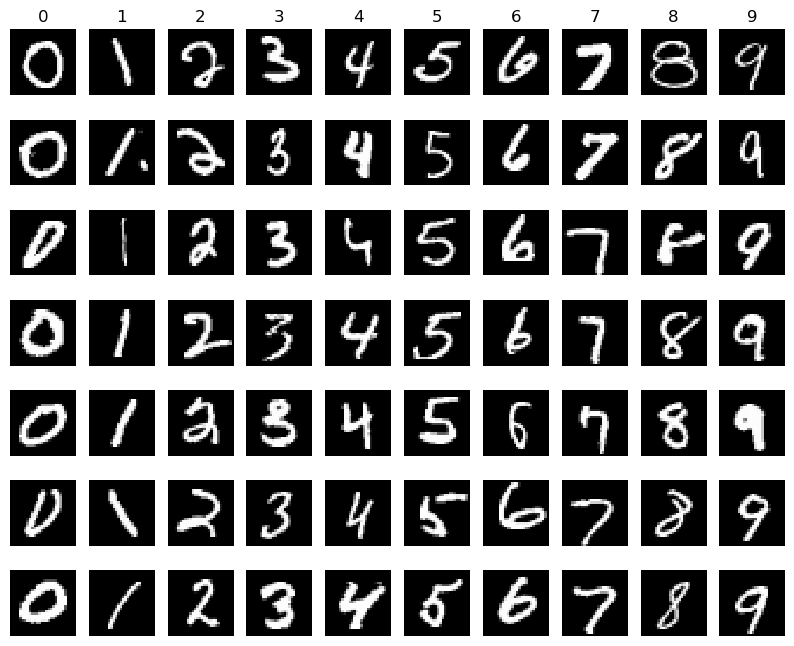

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(data['y_train'] == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(data['X_train'][idx].reshape((28, 28)))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Affine layer: forward
Open the file `layers.py` and implement the `affine_forward` function.

Once you are done you can test your implementaion by running the following:

In [15]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
print(out)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])

# Compare your output with ours. The error should be around 1e-9.
print('Testing affine_forward function:')
print('difference: {}'.format(rel_error(out, correct_out)))

[[1.49834967 1.70660132 1.91485297]
 [3.25553199 3.5141327  3.77273342]]
Testing affine_forward function:
difference: 9.769848888397517e-10


# Affine layer: backward
Now implement the `affine_backward` function and test your implementation using numeric gradient checking.

In [23]:
# Test the affine_backward function

x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around 1e-10
print('Testing affine_backward function:')
print('dx error: {}'.format(rel_error(dx_num, dx)))
print('dw error: {}'.format(rel_error(dw_num, dw)))
print('db error: {}'.format(rel_error(db_num, db)))

Testing affine_backward function:
dx error: 4.077319767627073e-10
dw error: 1.1733578569994813e-10
db error: 2.8365775187676775e-11


# ReLU layer: forward
Implement the forward pass for the ReLU activation function in the `relu_forward` function and test your implementation using the following:

In [22]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be around 1e-8
print('Testing relu_forward function:')
print('difference: {}'.format(rel_error(out, correct_out)))

Testing relu_forward function:
difference: 4.999999798022158e-08


# ReLU layer: backward
Now implement the backward pass for the ReLU activation function in the `relu_backward` function and test your implementation using numeric gradient checking:

In [24]:
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be around 1e-12
print('Testing relu_backward function:')
print('dx error: {}'.format(rel_error(dx_num, dx)))

Testing relu_backward function:
dx error: 3.2756416206018985e-12


## Inline Question 1(Bonus 1): 

We've only asked you to implement ReLU, but there are a number of different activation functions that one could use in neural networks, each with its pros and cons. In particular, an issue commonly seen with activation functions is getting zero (or close to zero) gradient flow during backpropagation. Which of the following activation functions have this problem? If you consider these functions in the one dimensional case, what types of input would lead to this behaviour?
1. Sigmoid
2. ReLU
3. [Leaky ReLU](https://cs231n.github.io/neural-networks-1/)

[Answer]   
Sigmoid has the problem of vanishing gradient,since $\sigma=\frac{1}{1+e^{-x}}\in(0,1),f'(net_1)*f'(net_2)*...\rightarrow 0$  
ReLU can address this problem but it may cause some nuerons to "die",since $ReLU(x)=max(0,x),ReLU(x)=0,if\ x<0$  
Leaky ReLU handles the dying nueron problem.$LeakyReLU(x)=max(\alpha x,x)$,common $\alpha=0.01$  
We have $LeakyReLU(x)=\begin{cases}x,if\ x\ge0 \\0.01x,if\ x<0\end{cases}$

So,Sigmoid and ReLU have the zero gradient problem but Leaky ReLU does not.  
For one dimensional case,sigmoid:$\sigma'(x)=\sigma(x)[1-\sigma(x)]$.It will lead to zero gradient if the input consists of many value with large absolute value($|x|>4$).  
ReLU will have zero gradient for negative input.  

# "Sandwich" layers
There are some common patterns of layers that are frequently used in neural nets. For example, affine layers are frequently followed by a ReLU nonlinearity. To make these common patterns easy, we define several convenience layers in the file `layer_utils.py`.

For now take a look at the `affine_relu_forward` and `affine_relu_backward` functions, and run the following to numerically gradient check the backward pass:

In [26]:
from layer_utils import affine_relu_forward, affine_relu_backward

x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

print('Testing affine_relu_forward and affine_relu_backward:')
print('dx error: {}'.format(rel_error(dx_num, dx)))
print('dw error: {}'.format(rel_error(dw_num, dw)))
print('db error: {}'.format(rel_error(db_num, db)))

Testing affine_relu_forward and affine_relu_backward:
dx error: 2.395466983065765e-10
dw error: 2.7674624164512364e-10
db error: 1.5748845379810967e-11


# Loss layers: Softmax and SVM
We give some loss functions here. You should still make sure you understand how they work by looking at the implementations in `layers.py`.

You can make sure that the implementations are correct by running the following:

In [27]:
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: svm_loss(x, y)[0], x, verbose=False)
loss, dx = svm_loss(x, y)

# Test svm_loss function. Loss should be around 9 and dx error should be 1e-9
print('Testing svm_loss:')
print('loss: {}'.format(loss))
print('dx error: {}'.format(rel_error(dx_num, dx)))

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be 2.3 and dx error should be 1e-8
print('\nTesting softmax_loss:')
print('loss: {}'.format(loss))
print('dx error: {}'.format(rel_error(dx_num, dx)))

Testing svm_loss:
loss: 8.99933593789717
dx error: 1.4021566006651672e-09

Testing softmax_loss:
loss: 2.3025191469456985
dx error: 8.900465733725541e-09


# Two-layer network

Now you will reimplement the two layer network using these modular implementations.

Open the file `fc_net.py` and complete the implementation of the `TwoLayerNet` class. This class will serve as a model for the other networks you will implement in this assignment, so read through it to make sure you understand the API. You can run the cell below to test your implementation.

In [33]:
N, D, H, C = 3, 5, 50, 7
X = np.random.randn(N, D)
y = np.random.randint(C, size=N)

std = 1e-2
model = TwoLayerNet(input_dim=D, hidden_dim=H, num_classes=C, weight_scale=std)

print('Testing initialization ... ')
W1_std = abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std / 10, 'First layer weights do not seem right'
assert np.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(b2 == 0), 'Second layer biases do not seem right'

print('Testing test-time forward pass ... ')
model.params['W1'] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
model.params['b1'] = np.linspace(-0.1, 0.9, num=H)
model.params['W2'] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
model.params['b2'] = np.linspace(-0.9, 0.1, num=C)
X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.loss(X)
correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
scores_diff = np.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

print('Testing training loss (no regularization)')
y = np.asarray([0, 5, 1])
loss, grads = model.loss(X, y)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

model.reg = 1.0
loss, grads = model.loss(X, y)
correct_loss = 26.5948426952
assert abs(loss - correct_loss) < 1e-10, 'Problem with regularization loss'

for reg in [0.0, 0.7]:
    print('Running numeric gradient check with reg = {}'.format(reg))
    model.reg = reg
    loss, grads = model.loss(X, y)

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False)
        print('{} relative error: {}'.format(name, rel_error(grad_num, grads[name])))

Testing initialization ... 
Testing test-time forward pass ... 
Testing training loss (no regularization)
Running numeric gradient check with reg = 0.0
W1 relative error: 1.5215703686475096e-08
W2 relative error: 3.1683629682891443e-10
b1 relative error: 8.368195737354163e-09
b2 relative error: 4.3291360264321544e-10
Running numeric gradient check with reg = 0.7
W1 relative error: 2.527915175868136e-07
W2 relative error: 2.8508510893102143e-08
b1 relative error: 1.5646801536371197e-08
b2 relative error: 7.759095355706557e-10


# Solver

Open the file `solver.py` and read through it to familiarize yourself with the API. After doing so, use a `Solver` instance to train a `TwoLayerNet` that achieves at least `95%` accuracy on the validation set.

In [31]:
model = TwoLayerNet()
solver = Solver(model, data)

##############################################################################
# TODO: Use a Solver instance to train a TwoLayerNet that achieves at least  #
# 95% accuracy on the validation set.                                        #
##############################################################################
# begin answer
data = {
    'X_train': data['X_train'], # training data
    'y_train': data['y_train'], # training labels
    'X_val': data['X_val'], # validation data
    'y_val': data['y_val'] # validation labels
}
solver = Solver(model, data,
                update_rule='sgd',
                optim_config={
                    'learning_rate': 0.1
                },
                lr_decay=0.95,
                num_epochs=10, batch_size=100,
                print_every=100)
solver.train()

# end answer

(Iteration 1 / 5000) loss: 2.302574
(Epoch 0 / 10) train acc: 0.170000; val_acc: 0.167600
(Iteration 101 / 5000) loss: 2.020134
(Iteration 201 / 5000) loss: 0.743498
(Iteration 301 / 5000) loss: 0.599638
(Iteration 401 / 5000) loss: 0.462786
(Epoch 1 / 10) train acc: 0.879000; val_acc: 0.887700
(Iteration 501 / 5000) loss: 0.292283
(Iteration 601 / 5000) loss: 0.383837
(Iteration 701 / 5000) loss: 0.338836
(Iteration 801 / 5000) loss: 0.408723
(Iteration 901 / 5000) loss: 0.276567
(Epoch 2 / 10) train acc: 0.916000; val_acc: 0.912600
(Iteration 1001 / 5000) loss: 0.222230
(Iteration 1101 / 5000) loss: 0.320685
(Iteration 1201 / 5000) loss: 0.168352
(Iteration 1301 / 5000) loss: 0.148547
(Iteration 1401 / 5000) loss: 0.128052
(Epoch 3 / 10) train acc: 0.935000; val_acc: 0.922800
(Iteration 1501 / 5000) loss: 0.266605
(Iteration 1601 / 5000) loss: 0.194932
(Iteration 1701 / 5000) loss: 0.179661
(Iteration 1801 / 5000) loss: 0.188567
(Iteration 1901 / 5000) loss: 0.262772
(Epoch 4 / 10) t

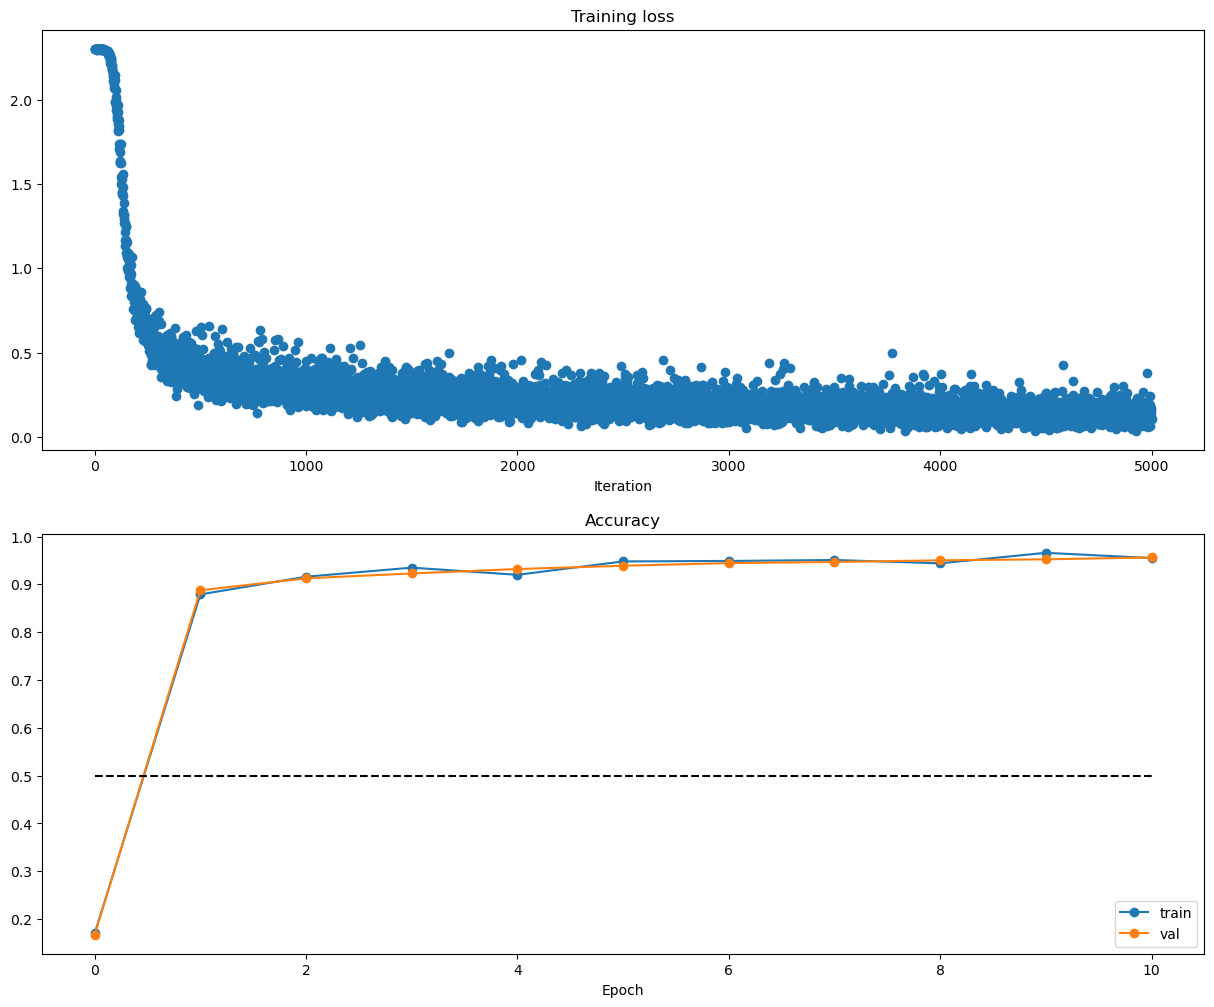

In [32]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# Multilayer network
Next you will implement a fully-connected network with an arbitrary number of hidden layers.

Read through the `FullyConnectedNet` class in the file `fc_net.py`.

Implement the initialization, the forward pass, and the backward pass.

## Initial loss and gradient check

As a sanity check, run the following to check the initial loss and to gradient check the network both with and without regularization. Do the initial losses seem reasonable?

For gradient checking, you should expect to see errors around 1e-6 or less.

In [34]:
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for reg in [0, 3.14]:
    print('Running check with reg = {}'.format(reg))
    model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C,
                            reg=reg, weight_scale=5e-2, dtype=np.float64)

    loss, grads = model.loss(X, y)
    print('Initial loss: {}'.format(loss))

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print('{} relative error: {}'.format(name, rel_error(grad_num, grads[name])))

Running check with reg = 0
Initial loss: 2.302936665307814
W1 relative error: 6.888183591697037e-07
W2 relative error: 5.417024551066188e-07
W3 relative error: 4.208049313625398e-07
b1 relative error: 9.758018436897972e-09
b2 relative error: 2.0776868364146868e-08
b3 relative error: 1.2878829250265214e-10
Running check with reg = 3.14
Initial loss: 7.3258268035529985
W1 relative error: 7.558951612630349e-08
W2 relative error: 1.5514618200219615e-07
W3 relative error: 3.129278196315526e-08
b1 relative error: 4.393222214060483e-08
b2 relative error: 2.376977076742191e-08
b3 relative error: 1.5798829171887025e-10


As another sanity check, make sure you can overfit a small dataset of 50 images. First we will try a three-layer network with 100 units in each hidden layer. You will need to tweak the learning rate and initialization scale, but you should be able to overfit and achieve 100% training accuracy within 20 epochs.

(Iteration 1 / 40) loss: 2.451721
(Epoch 0 / 20) train acc: 0.180000; val_acc: 0.152400
(Epoch 1 / 20) train acc: 0.220000; val_acc: 0.147400
(Epoch 2 / 20) train acc: 0.400000; val_acc: 0.234600
(Epoch 3 / 20) train acc: 0.320000; val_acc: 0.158300
(Epoch 4 / 20) train acc: 0.660000; val_acc: 0.346900
(Epoch 5 / 20) train acc: 0.720000; val_acc: 0.331900
(Iteration 11 / 40) loss: 1.409961
(Epoch 6 / 20) train acc: 0.640000; val_acc: 0.370400
(Epoch 7 / 20) train acc: 0.720000; val_acc: 0.378600
(Epoch 8 / 20) train acc: 0.760000; val_acc: 0.373700
(Epoch 9 / 20) train acc: 0.840000; val_acc: 0.455000
(Epoch 10 / 20) train acc: 0.920000; val_acc: 0.484700
(Iteration 21 / 40) loss: 0.566615
(Epoch 11 / 20) train acc: 0.940000; val_acc: 0.484700
(Epoch 12 / 20) train acc: 0.940000; val_acc: 0.507100
(Epoch 13 / 20) train acc: 0.920000; val_acc: 0.466700
(Epoch 14 / 20) train acc: 0.960000; val_acc: 0.477500
(Epoch 15 / 20) train acc: 0.980000; val_acc: 0.511900
(Iteration 31 / 40) loss: 

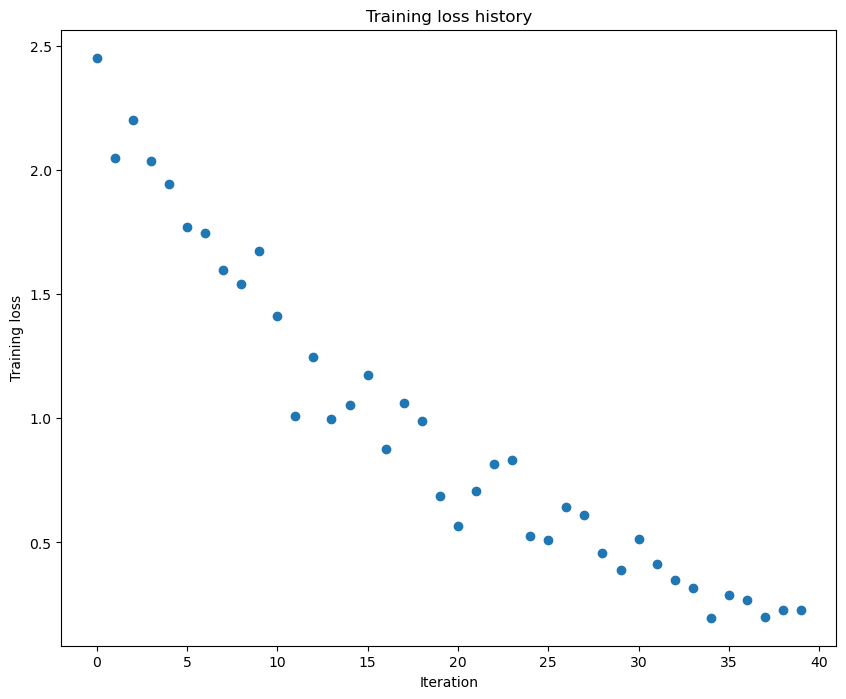

In [49]:
# TODO: Use a three-layer Net to overfit 50 training examples.

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

# tweak these two parameters
# begin answer
weight_scale = 1e-1
learning_rate = 1e-1
# end answer
model = FullyConnectedNet([100, 100],
              weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

Now try to use a five-layer network with 100 units on each layer to overfit 50 training examples. Again you will have to adjust the learning rate and weight initialization, but you should be able to achieve 100% training accuracy within 20 epochs.

(Iteration 1 / 40) loss: 2.342777
(Epoch 0 / 20) train acc: 0.200000; val_acc: 0.127800
(Epoch 1 / 20) train acc: 0.140000; val_acc: 0.111400
(Epoch 2 / 20) train acc: 0.560000; val_acc: 0.300800
(Epoch 3 / 20) train acc: 0.320000; val_acc: 0.163900
(Epoch 4 / 20) train acc: 0.500000; val_acc: 0.251800
(Epoch 5 / 20) train acc: 0.360000; val_acc: 0.246800
(Iteration 11 / 40) loss: 1.773387
(Epoch 6 / 20) train acc: 0.620000; val_acc: 0.324300
(Epoch 7 / 20) train acc: 0.320000; val_acc: 0.201800
(Epoch 8 / 20) train acc: 0.840000; val_acc: 0.398700
(Epoch 9 / 20) train acc: 0.700000; val_acc: 0.361400
(Epoch 10 / 20) train acc: 0.820000; val_acc: 0.398200
(Iteration 21 / 40) loss: 0.579955
(Epoch 11 / 20) train acc: 0.640000; val_acc: 0.274700
(Epoch 12 / 20) train acc: 0.460000; val_acc: 0.291000
(Epoch 13 / 20) train acc: 0.880000; val_acc: 0.486900
(Epoch 14 / 20) train acc: 0.880000; val_acc: 0.483600
(Epoch 15 / 20) train acc: 0.880000; val_acc: 0.504300
(Iteration 31 / 40) loss: 

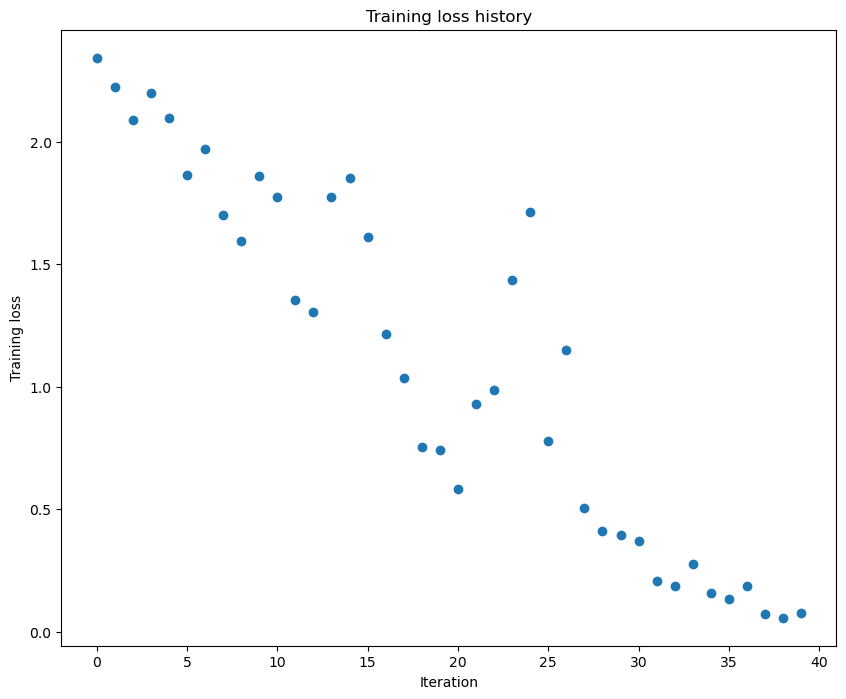

In [87]:
# TODO: Use a five-layer Net to overfit 50 training examples.

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

# begin answer
weight_scale = 1e-1
learning_rate = 2e-1
# end answer
model = FullyConnectedNet([100, 100, 100, 100],
            weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
               )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

## Inline question 2 (Bonus 2): 
Did you notice anything about the comparative difficulty of training the three-layer net vs training the five-layer net?


[Answer]  
Setting proper hyperparameters for training the five-layer net is much much more difficult than training the three-layer net.  
This is because the deeper the network is,the more sensitive to the hyperparameters it will be.  
Normally,we expect deeper neural network to have smaller learning rate because of the cumulative product of the gradients.  
Meanwhile,we also expect a larger weight scale in case of the vanishing activation during the forward process.  
However,in this experiment,both the weight scale and the learning rate is large,which achieve a 'balance'.Also,MNIST is a easy dataset and is not so sentitive to the hyperparameters.  

# Update rules
So far we have used vanilla stochastic gradient descent (SGD) as our update rule in assignment2.
```
# Vanilla update
x += - learning_rate * dx
```

More sophisticated update rules can make it easier to train deep networks. We will implement a few of the most commonly used update rules and compare them to vanilla SGD.

# SGD+Momentum
Stochastic gradient descent with momentum is a widely used update rule that tends to make deep networks converge faster than vanilla stochstic gradient descent.

```python
# Momentum update
v = mu * v - learning_rate * dx # integrate velocity
x += v # integrate position
```

Now open the file `optim.py` and read the documentation at the top of the file to make sure you understand the API. The implementation of vanilla SGD is provided. Implement the SGD+momentum update rule in the function `sgd_momentum` and run the following to check your implementation. You should see errors less than 1e-8.

In [3]:
from optim import sgd_momentum

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-3, 'velocity': v}
next_w, _ = sgd_momentum(w, dw, config=config)

expected_next_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print('next_w error: {}'.format(rel_error(next_w, expected_next_w)))
print('velocity error: {}'.format(rel_error(expected_velocity, config['velocity'])))

next_w error: 8.882347033505819e-09
velocity error: 4.269287743278663e-09


Once you have done so, run the following to train a six-layer network with both SGD and SGD+momentum. You should see the SGD+momentum update rule converge faster.

running with sgd
(Iteration 1 / 200) loss: 2.302624
(Epoch 0 / 5) train acc: 0.108000; val_acc: 0.093300
(Iteration 11 / 200) loss: 2.299550
(Iteration 21 / 200) loss: 2.294092
(Iteration 31 / 200) loss: 2.299959
(Epoch 1 / 5) train acc: 0.118000; val_acc: 0.106200
(Iteration 41 / 200) loss: 2.306465
(Iteration 51 / 200) loss: 2.306308
(Iteration 61 / 200) loss: 2.301772
(Iteration 71 / 200) loss: 2.299026
(Epoch 2 / 5) train acc: 0.182000; val_acc: 0.171900
(Iteration 81 / 200) loss: 2.298886
(Iteration 91 / 200) loss: 2.296578
(Iteration 101 / 200) loss: 2.296857
(Iteration 111 / 200) loss: 2.294694
(Epoch 3 / 5) train acc: 0.102000; val_acc: 0.097600
(Iteration 121 / 200) loss: 2.287045
(Iteration 131 / 200) loss: 2.278025
(Iteration 141 / 200) loss: 2.296436
(Iteration 151 / 200) loss: 2.287428
(Epoch 4 / 5) train acc: 0.203000; val_acc: 0.186000
(Iteration 161 / 200) loss: 2.277881
(Iteration 171 / 200) loss: 2.275401
(Iteration 181 / 200) loss: 2.239232
(Iteration 191 / 200) loss

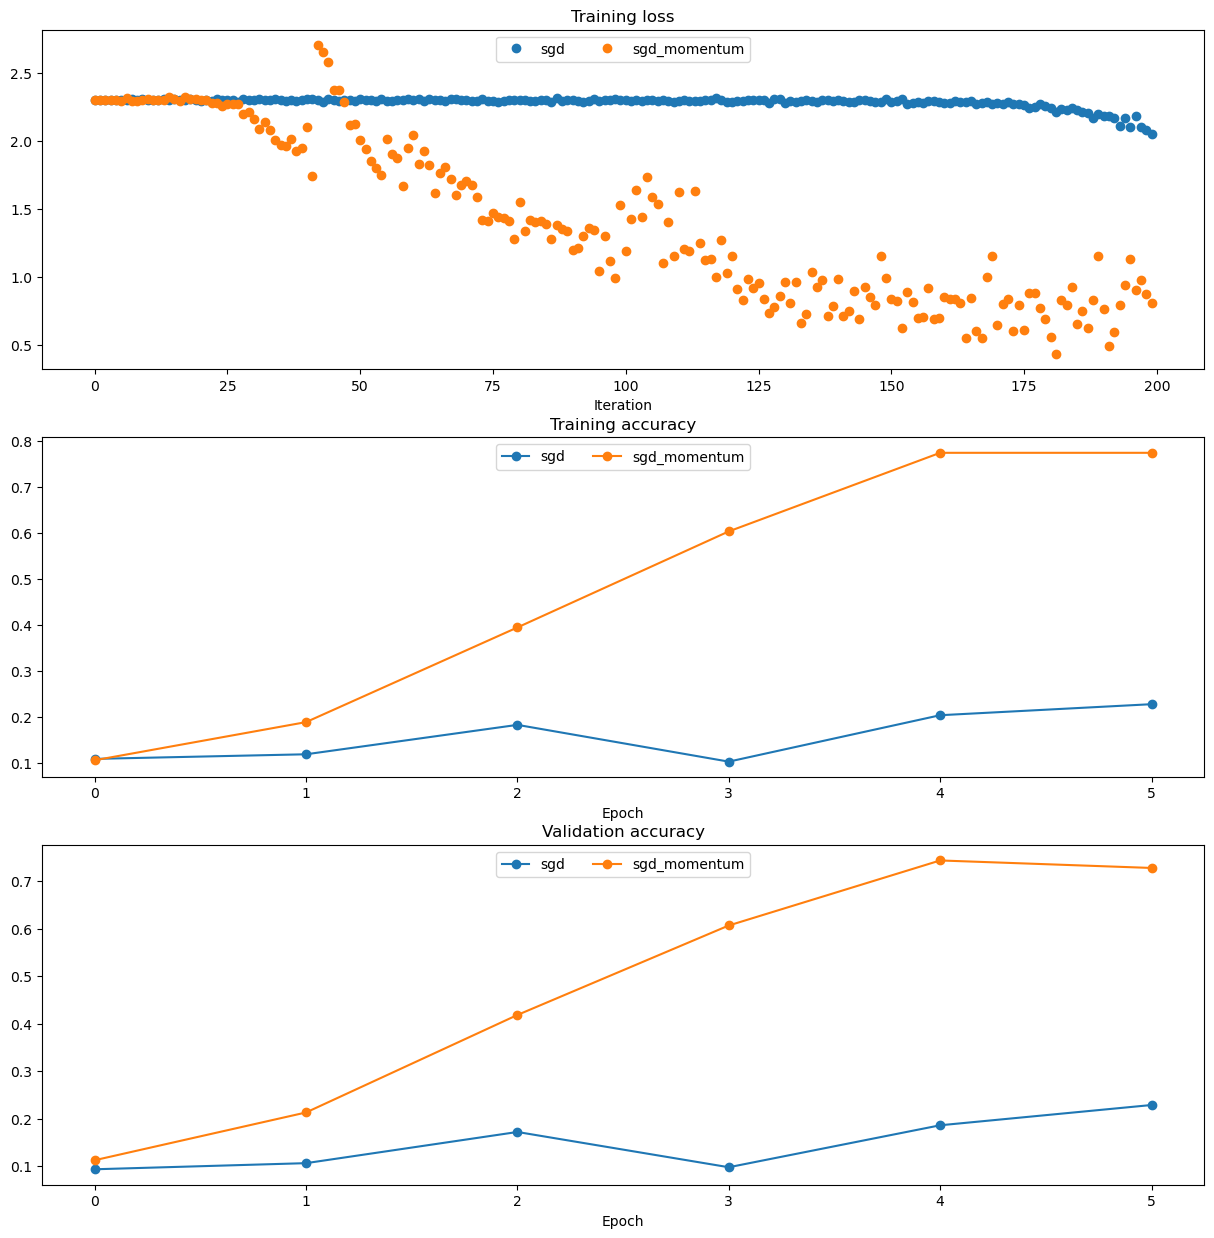

In [6]:
num_train = 4000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

solvers = {}

for update_rule in ['sgd', 'sgd_momentum']:
    print('running with {}'.format(update_rule))
    model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

    solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': 0.2,
                  },
                  verbose=True)
    solvers[update_rule] = solver
    solver.train()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.items():
    plt.subplot(3, 1, 1)
    plt.plot(solver.loss_history, 'o', label=update_rule)
  
    plt.subplot(3, 1, 2)
    plt.plot(solver.train_acc_history, '-o', label=update_rule)

    plt.subplot(3, 1, 3)
    plt.plot(solver.val_acc_history, '-o', label=update_rule)

for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()